In [1]:
# Import all the things

import json
import pandas as pd
import numpy as np
import wrangle
import acquire
from prepare import basic_clean, tokenize, lemmatize, stem, remove_stopwords, split_data, prep_string_data

import re
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

import nltk

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle.get_npr_data()
df.head()

The df has 2998347 rows and 10 columns.


,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,date
episode_id,,,,,,,,,,
57264,9,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...","It's a 2,200-mile race. To give some sense of ...",Talk of the Nation,How To Watch The Tour De France,False,it s a 2200 mile race. to give some sense of p...,2200 mile race. give sense perspective roughly...,0.0000,2010-07-12
57264,10,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",So for a top competitor like Lance to try to m...,Talk of the Nation,How To Watch The Tour De France,False,so for a top competitor like lance to try to m...,top competitor like lance try make much time 1...,0.9313,2010-07-12
57264,11,"NEAL CONAN, host","So in every team, presumably there's one star,...",Talk of the Nation,How To Watch The Tour De France,True,so in every team presumably there s one star o...,every team presumably one star one equivalent ...,0.7096,2010-07-12
57264,12,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",That's right. Each team has nine riders. And w...,Talk of the Nation,How To Watch The Tour De France,False,that s right. each team has nine riders. and w...,right. team ha nine riders. basically team lea...,0.9274,2010-07-12
57264,13,"NEAL CONAN, host","So slipstream, this is like drafting in car ra...",Talk of the Nation,How To Watch The Tour De France,True,so slipstream this is like drafting in car rac...,slipstream like drafting car racing right ?,0.3612,2010-07-12


## Is there a difference in the mean sentiment by speaker? Program? etc
- Applied statistics-> i.e. stats testing. Is there a difference in the mean sentiment by speaker? Program? etc 

In [3]:
df.columns

Index(['episode_order', 'speaker', 'utterance', 'program', 'title', 'is_host',
       'clean', 'lemmatized_stopped', 'vader_stopped', 'date'],
      dtype='object')

In [4]:
df.shape

(2998347, 10)

In [5]:
df.dtypes

episode_order           int64
speaker                object
utterance              object
program                object
title                  object
is_host                  bool
clean                  object
lemmatized_stopped     object
vader_stopped         float64
date                   object
dtype: object

In [6]:
df.date = pd.to_datetime(df.date)

In [7]:
df.dtypes

episode_order                  int64
speaker                       object
utterance                     object
program                       object
title                         object
is_host                         bool
clean                         object
lemmatized_stopped            object
vader_stopped                float64
date                  datetime64[ns]
dtype: object

In [8]:

# df['Date'].dt.strftime('%b-%Y')

# df['episode_date'].dt.strftime('%b')

In [9]:
df['month']=df['date'].dt.strftime('%b')
df['year']=pd.DatetimeIndex(df['date']).year
df=df.reset_index()
df.head()

,episode_id,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,date,month,year
0,57264,9,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...","It's a 2,200-mile race. To give some sense of ...",Talk of the Nation,How To Watch The Tour De France,False,it s a 2200 mile race. to give some sense of p...,2200 mile race. give sense perspective roughly...,0.0000,2010-07-12,Jul,2010
1,57264,10,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",So for a top competitor like Lance to try to m...,Talk of the Nation,How To Watch The Tour De France,False,so for a top competitor like lance to try to m...,top competitor like lance try make much time 1...,0.9313,2010-07-12,Jul,2010
2,57264,11,"NEAL CONAN, host","So in every team, presumably there's one star,...",Talk of the Nation,How To Watch The Tour De France,True,so in every team presumably there s one star o...,every team presumably one star one equivalent ...,0.7096,2010-07-12,Jul,2010
3,57264,12,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",That's right. Each team has nine riders. And w...,Talk of the Nation,How To Watch The Tour De France,False,that s right. each team has nine riders. and w...,right. team ha nine riders. basically team lea...,0.9274,2010-07-12,Jul,2010
4,57264,13,"NEAL CONAN, host","So slipstream, this is like drafting in car ra...",Talk of the Nation,How To Watch The Tour De France,True,so slipstream this is like drafting in car rac...,slipstream like drafting car racing right ?,0.3612,2010-07-12,Jul,2010


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=df.set_index('date').sort_index()

In [12]:
df.head(1)

,episode_id,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,month,year
date,,,,,,,,,,,,
1999-01-08,141179,9,ISABELLE DELUCA,"Yes. It's like my soul sings, I see Rio de Jan...",All Things Considered,Airport Samba,False,yes. it s like my soul sings i see rio de jani...,yes. like soul sings see rio de janiero miss m...,0.5994,Jan,1999


In [13]:
host_df = df[df.is_host==True]

In [14]:
host_df.shape

(632305, 12)

In [15]:
# are there repeats in the host_df? 
host_df.speaker.value_counts()

NEAL CONAN, host         204935
IRA FLATOW, host          58172
FARAI CHIDEYA, host       36462
MADELEINE BRAND, host     26313
ROBERT SIEGEL, host       23846
                          ...  
RENEEE MONTAGNE, host         1
Melissa Block, host           1
AN, host                      1
RENEE INSKEEP, host           1
ALEXCHADWICK, host            1
Name: speaker, Length: 236, dtype: int64

- I can see two different duplicates for steve inskeep bc of typos
- I think this is going to fall into the arena of significantly diminishing returns, and I will not address it at this time

In [16]:
hosts_with_the_most = host_df.speaker.value_counts().head(12).index.to_list()

- This is a list of the 12 hosts with the most observations

In [17]:
hosts_with_the_most

['NEAL CONAN, host',
 'IRA FLATOW, host',
 'FARAI CHIDEYA, host',
 'MADELEINE BRAND, host',
 'ROBERT SIEGEL, host',
 'STEVE INSKEEP, host',
 'ALEX CHADWICK, host',
 'MELISSA BLOCK, host',
 'RENEE MONTAGNE, host',
 'GUY RAZ, host',
 'ED GORDON, host',
 'MICHELE NORRIS, host']

In [18]:
top_hosts_df = df[df.speaker.isin(hosts_with_the_most)]

In [19]:
top_hosts_df.head(1)

,episode_id,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,month,year
date,,,,,,,,,,,,
2004-06-07,135286,35,"STEVE INSKEEP, host",The time is 29 minutes past the hour.,Morning Edition,Study Sheds Light on Compulsive Hoarding,True,the time is 29 minutes past the hour .,time 29 minute past hour .,0.0,Jun,2004


In [21]:
top_hosts_df.index.min(), top_hosts_df.index.max()

(Timestamp('2004-06-07 00:00:00'), Timestamp('2011-11-10 00:00:00'))

In [22]:
top_hosts_df.vader_stopped.mean()

0.16464489271365054

- Here, we have the average sentiment score for all the top hosts; as you can see, it is relatively neutral in sentiment

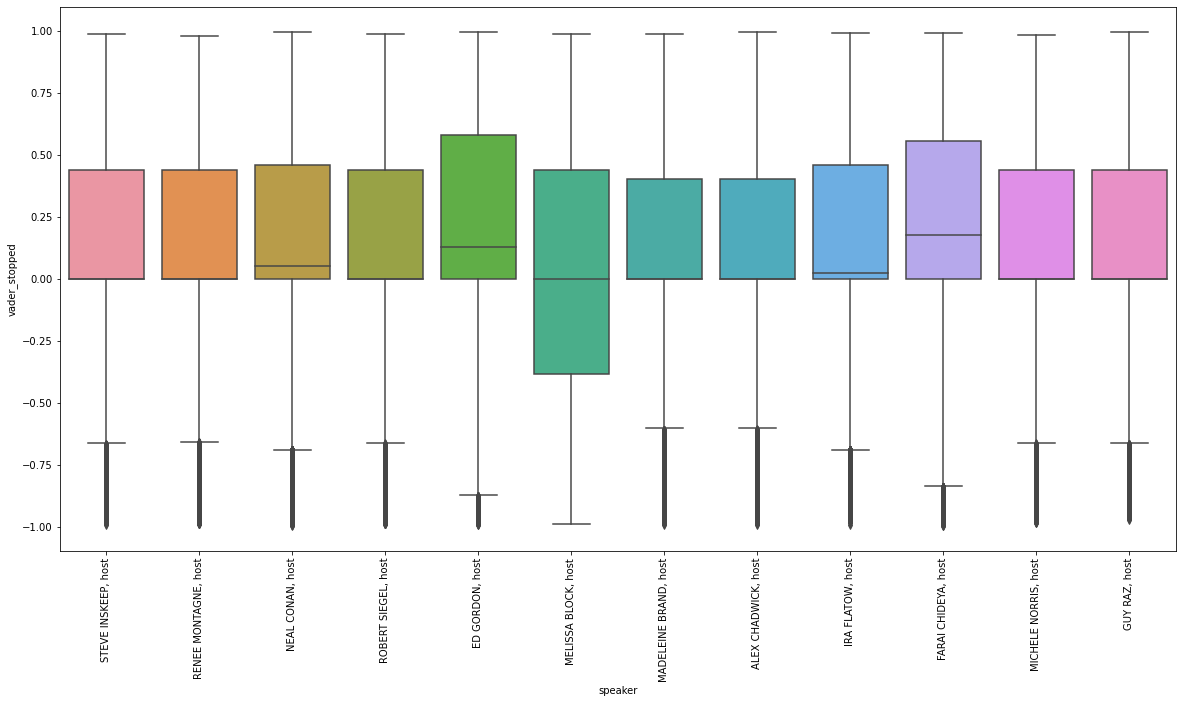

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(data=top_hosts_df, x='speaker',y='vader_stopped')
plt.xticks(rotation=90);

- The mean sentiment value is awfully close for everyone here, so i'm going to stats test it with an ANOVA test

In [24]:
null_hypothesis = "Average sentiment score is the same across hosts"
alternative_hypothesis = "Average sentiment score is different in at least one host of the group"
alpha = 0.01 # Let's be 99% certain the result we see isn't due to chance/randomness

In [25]:
host_df_list=[]
for host in hosts_with_the_most:
    x = host.split()
    host_df_list.append(f'{x[0]}_df')
print(host_df_list)

['NEAL_df', 'IRA_df', 'FARAI_df', 'MADELEINE_df', 'ROBERT_df', 'STEVE_df', 'ALEX_df', 'MELISSA_df', 'RENEE_df', 'GUY_df', 'ED_df', 'MICHELE_df']


In [26]:
# Let's isolate our hosts
NEAL_df = df[df.speaker == 'NEAL CONAN, host'].vader_stopped
IRA_df = df[df.speaker == 'IRA FLATOW, host'].vader_stopped
FARAI_df = df[df.speaker == 'FARAI CHIDEYA, host'].vader_stopped
MADELEINE_df = df[df.speaker == 'MADELEINE BRAND, host'].vader_stopped
ROBERT_df = df[df.speaker == 'ROBERT SIEGEL, host'].vader_stopped
STEVE_df = df[df.speaker == 'STEVE INSKEEP, host'].vader_stopped
ALEX_df = df[df.speaker == 'ALEX CHADWICK, host'].vader_stopped
MELISSA_df = df[df.speaker == 'MELISSA BLOCK, host'].vader_stopped
RENEE_df = df[df.speaker == 'RENEE MONTAGNE, host'].vader_stopped
GUY_df = df[df.speaker == 'GUY RAZ, host'].vader_stopped
ED_df = df[df.speaker == 'ED GORDON, host'].vader_stopped
MICHELE_df = df[df.speaker == 'MICHELE NORRIS, host'].vader_stopped

In [29]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info
from scipy.stats import f_oneway

f, p = f_oneway(NEAL_df, IRA_df, FARAI_df, MADELEINE_df, ROBERT_df, STEVE_df, ALEX_df, MELISSA_df, RENEE_df, GUY_df, ED_df, MICHELE_df)
f, p

(517.9704631307725, 0.0)

In [28]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that sentiment differs from host to host")

We reject the null hypothesis that Average sentiment score is the same across hosts
We move forward with the alternative hypothesis that Average sentiment score is different in at least one host of the group


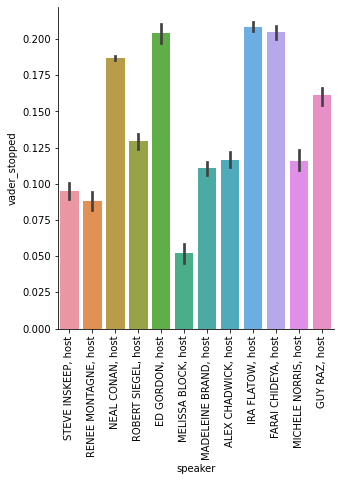

In [30]:
sns.catplot(x="speaker", y="vader_stopped", kind="bar", data=top_hosts_df)
plt.xticks(rotation=90);

- Another view of the same...it looks more clear here that there is a difference, however note the small scale on the y axis

In [32]:
top_hosts_df.head(1)

,episode_id,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,month,year
date,,,,,,,,,,,,
2004-06-07,135286,35,"STEVE INSKEEP, host",The time is 29 minutes past the hour.,Morning Edition,Study Sheds Light on Compulsive Hoarding,True,the time is 29 minutes past the hour .,time 29 minute past hour .,0.0,Jun,2004


### The conclusion to the above is that there is a statistically significant difference in sentiment in the top hosts group, even if it is small.

## What's the difference in sentiment score between hosts and non-hosts?

In [34]:
non_host_df = df[df.is_host==False]

In [ ]:
plt.figure
plt.boxplot(data=df, x=)